Bu notebookda örnek metin üzerinde tek tek gerekli nlp adımlarını işledim.

Sırasıyla:
- case normalizing
- remove special characters
- remove stop words
- word visualizatiom
- tokenization
- lemmatization
- POS
- NER

Örnek metnimiz:
On January 3rd, 2023, Dr. Emily Watson, a senior data scientist at GreenAI Inc., gave a keynote speech at the International Conference on Artificial Intelligence in Paris, France. During her talk, she emphasized the importance of ethical AI and data privacy, citing recent cases of misuse in various industries.

She mentioned that over 3.2 million users were affected by a data breach last year, resulting in damages estimated at $12.5 million. Furthermore, she highlighted the role of open-source libraries, such as spaCy and NLTK, in democratizing access to natural language processing tools. According to her, students and researchers can now build high-quality NLP models without needing large financial resources.

"AI is not just about machines," she said, "it’s about how we interact with technology in a human-centered way." After the session, attendees from universities like Stanford, MIT, and Oxford approached her to discuss future collaboration opportunities.

At 5:45 PM, she posted a summary of her speech on Twitter, receiving over 8,000 likes and 1,200 retweets within a few hours. Her tweet included hashtags like #AIethics, #DataPrivacy, and #NLPtools.

The event concluded with a panel discussion moderated by Mr. John Lee, a journalist from TechWorld Weekly, who asked, “How can governments regulate AI without stifling innovation?”

Öncelikle metnimi bir değişkene atıyorum üzerinde değişiklikler yapmak amacıyla


In [1]:
text = """
On January 3rd, 2023, Dr. Emily Watson, a senior data scientist at GreenAI Inc., gave a keynote speech at the International Conference on Artificial Intelligence in Paris, France. During her talk, she emphasized the importance of ethical AI and data privacy, citing recent cases of misuse in various industries.

She mentioned that over 3.2 million users were affected by a data breach last year, resulting in damages estimated at $12.5 million. Furthermore, she highlighted the role of open-source libraries, such as spaCy and NLTK, in democratizing access to natural language processing tools. According to her, students and researchers can now build high-quality NLP models without needing large financial resources.

"AI is not just about machines," she said, "it’s about how we interact with technology in a human-centered way." After the session, attendees from universities like Stanford, MIT, and Oxford approached her to discuss future collaboration opportunities.

At 5:45 PM, she posted a summary of her speech on Twitter, receiving over 8,000 likes and 1,200 retweets within a few hours. Her tweet included hashtags like #AIethics, #DataPrivacy, and #NLPtools.

The event concluded with a panel discussion moderated by Mr. John Lee, a journalist from TechWorld Weekly, who asked, “How can governments regulate AI without stifling innovation?”
"""

In [2]:
print("NLP İşlemlerinden Önceki Metin Uzunluğu: " + str(len(text)))

NLP İşlemlerinden Önceki Metin Uzunluğu: 1356


Yapacağımız işlemler öncesi metin uzunluğunun 1356 olduğunu görebilmekteyiz.

## Case Normalizing
Bu adımda bütün karakterleri lower case yapalım

In [4]:
#Tüm Karakterleri Küçük Harfe Çevirme.
text = text.lower()

Bütün karakterleri küçük harfe çevirdikten sonra özel karakterleri ve stop wordleri temizleyelim ki textimiz üzerinde daha doğru işlermler yapabilelim.

## Remove Special Characters

In [3]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords', download_dir='/usr/share/nltk_data')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Removing Numbers
text = re.sub(r'\d+', '', text)

# Removing Punctuations
text = re.sub(r'[^\w\s]', '', text)

# Removing Useless Spaces
text = re.sub(r'\s+', ' ', text)
text = text.strip()

stop_words = set(stopwords.words('english'))
text_words = text.split()

print("before:", len(text_words))

# Remove Stop Words
text_words = [word for word in text_words if word not in stop_words]

print("after:", len(text_words))

text = " ".join(text_words)


before: 199
after: 123


In [6]:
text

'january rd dr emily watson senior data scientist greenai inc gave keynote speech international conference artificial intelligence paris france talk emphasized importance ethical ai data privacy citing recent cases misuse various industries mentioned million users affected data breach last year resulting damages estimated million furthermore highlighted role opensource libraries spacy nltk democratizing access natural language processing tools according students researchers build highquality nlp models without needing large financial resources ai machines said interact technology humancentered way session attendees universities like stanford mit oxford approached discuss future collaboration opportunities pm posted summary speech twitter receiving likes retweets within hours tweet included hashtags like aiethics dataprivacy nlptools event concluded panel discussion moderated mr john lee journalist techworld weekly asked governments regulate ai without stifling innovation'

Şimdi rare wordsleri yani 1den daha az geçen kelimeleri bulalım ve kaldıralım.

In [7]:
import pandas as pd
# 1'den az kullanılan kelimeleri kaldıralım
text_words = text.split()
temp_words = pd.Series(text_words).value_counts()
temp_words.head(10)

,count
data,3
ai,3
speech,2
million,2
without,2
like,2
rd,1
scientist,1
greenai,1
dr,1


## Word Visualization

Bu adımda kelime görselleştirme yapacağız.

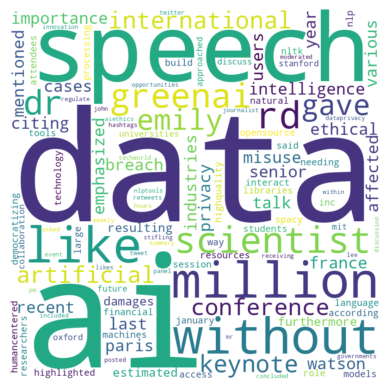

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    min_font_size=10
).generate_from_frequencies(temp_words.to_dict())

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Word cloud kelime görselleştirmesinde frekansı en yüksek olan yani en çok tekrar eden kelimeler daha büyük boyda gözlemlenir. Elde ettiğimiz word clouda baktığımızda bizim metnimizdeki frekansı en yüksek olan kelimeler a ve data'ymış

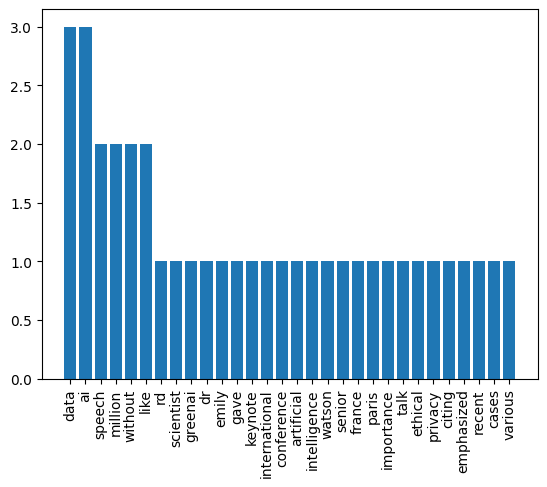

In [9]:
plt.bar(temp_words.index[:30], temp_words.values[:30])
plt.xticks(rotation=90)
plt.show()

## Tokenization
tokenizasyon işlemi aslında metni bazı parçalara bölmek olarak tanımlanabilir yani kelimelere veya daha küçük parçalara bölme işlemine tokenization diyoruz.

In [11]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
# Kelime bazında tokenleştirme.
tokens = word_tokenize(text)
print("Metindeki Token Sayısı: ",len(tokens))

Metindeki Token Sayısı:  123


## Lemmatization


In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

In [15]:
print(lemmatized_tokens)
print(tokens)

['january', 'rd', 'dr', 'emily', 'watson', 'senior', 'data', 'scientist', 'greenai', 'inc', 'gave', 'keynote', 'speech', 'international', 'conference', 'artificial', 'intelligence', 'paris', 'france', 'talk', 'emphasized', 'importance', 'ethical', 'ai', 'data', 'privacy', 'citing', 'recent', 'case', 'misuse', 'various', 'industry', 'mentioned', 'million', 'user', 'affected', 'data', 'breach', 'last', 'year', 'resulting', 'damage', 'estimated', 'million', 'furthermore', 'highlighted', 'role', 'opensource', 'library', 'spacy', 'nltk', 'democratizing', 'access', 'natural', 'language', 'processing', 'tool', 'according', 'student', 'researcher', 'build', 'highquality', 'nlp', 'model', 'without', 'needing', 'large', 'financial', 'resource', 'ai', 'machine', 'said', 'interact', 'technology', 'humancentered', 'way', 'session', 'attendee', 'university', 'like', 'stanford', 'mit', 'oxford', 'approached', 'discus', 'future', 'collaboration', 'opportunity', 'pm', 'posted', 'summary', 'speech', 'tw

## Part of Speech Tagging (POS)

In [22]:
post = nltk.pos_tag(tokens)
print(post)


"""
CC bağlaç
JJ sıfat
NN isim
RB zarf
VB fiil
"""

[('january', 'JJ'), ('rd', 'NN'), ('dr', 'VBD'), ('emily', 'RB'), ('watson', 'JJ'), ('senior', 'JJ'), ('data', 'NNS'), ('scientist', 'NN'), ('greenai', 'NN'), ('inc', 'NN'), ('gave', 'VBD'), ('keynote', 'NN'), ('speech', 'NN'), ('international', 'JJ'), ('conference', 'NN'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('paris', 'NN'), ('france', 'NN'), ('talk', 'NN'), ('emphasized', 'VBD'), ('importance', 'NN'), ('ethical', 'JJ'), ('ai', 'NN'), ('data', 'NNS'), ('privacy', 'NN'), ('citing', 'VBG'), ('recent', 'JJ'), ('cases', 'NNS'), ('misuse', 'VBP'), ('various', 'JJ'), ('industries', 'NNS'), ('mentioned', 'VBN'), ('million', 'CD'), ('users', 'NNS'), ('affected', 'VBD'), ('data', 'NNS'), ('breach', 'NN'), ('last', 'JJ'), ('year', 'NN'), ('resulting', 'VBG'), ('damages', 'NNS'), ('estimated', 'VBN'), ('million', 'CD'), ('furthermore', 'RB'), ('highlighted', 'JJ'), ('role', 'NN'), ('opensource', 'NN'), ('libraries', 'NNS'), ('spacy', 'VBP'), ('nltk', 'JJ'), ('democratizing', 'VBG'), ('

'\nCC bağlaç\nJJ sıfat\nNN isim\nRB zarf\nVB fiil\n'

## Named Entity Recognition (NER)

In [17]:
import spacy

# SpaCy'nin İngilizce modelini yüklüyoruz
nlp = spacy.load("en_core_web_sm")

# Metni analiz et
doc = nlp(text)

# Varlıkları (Entities) bul ve yazdır
print(f"{'Entity':<30} {'Label':<15} {'Explanation'}")
print("-" * 60)
for ent in doc.ents:
    print(f"{ent.text:<30} {ent.label_:<15} {spacy.explain(ent.label_)}")

Entity                         Label           Explanation
------------------------------------------------------------
january                        DATE            Absolute or relative dates or periods
scientist greenai inc          ORG             Companies, agencies, institutions, etc.
paris                          GPE             Countries, cities, states
france                         GPE             Countries, cities, states
million                        CARDINAL        Numerals that do not fall under another type
last year                      DATE            Absolute or relative dates or periods
damages estimated million      CARDINAL        Numerals that do not fall under another type
stanford mit                   ORG             Companies, agencies, institutions, etc.
oxford                         ORG             Companies, agencies, institutions, etc.
hours                          TIME            Times smaller than a day
john lee                       PERSON          